# Correlação de Pearson

In [1]:
import numpy as np

## Correlação negativa perfeita

In [2]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([-1, -2, -3, -4, -5])

In [3]:
correlacao = np.corrcoef(x, y)
correlacao

array([[ 1., -1.],
       [-1.,  1.]])

## Correlação qualquer

In [4]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.1, 2.5, 2.7, 3.9, 5.1])

In [5]:
correlacao = np.corrcoef(x, y)
correlacao

array([[1.        , 0.98258436],
       [0.98258436, 1.        ]])

In [6]:
print(f"Correlação: {correlacao[0][1]}")

Correlação: 0.9825843617583315


In [16]:
import pandas as pd
pd.set_option('display.max_info_columns', 500)

In [8]:
x = np.array([1, 2, 3, 4, 5])
y = np.array([1.1, 2.5, 2.7, 3.9, 5.1])

df = pd.DataFrame({"x":x, "y":y})

In [9]:
df.corr(numeric_only=True)

,x,y
x,1.000000,0.982584
y,0.982584,1.000000


## Cálculo de correlação usando IGM

In [18]:
df_igm = pd.read_csv("../../datasets/igm_modificado.csv")

In [19]:
df_igm.head()

,regiao,estado,municipio,codigo_mun,capital,porte,populacao,area,densidade_dem,pib,...,gasto_pc_educacao,exp_anos_estudo,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao,idhm,ranking_igm,indice_governanca
0,SUDESTE,SP,ILHABELA,3520400,0,Pequeno porte 2,"32,782",347.52,81.1,3.256712e+06,...,1734.52,10.63,482.054348,541.226087,530.651111,507.952778,499.361111,0.747,1º,0.767
1,SUDESTE,SP,SANTANA DE PARNAIBA,3547304,0,Grande porte,"129,261",179.95,604.7,7.373603e+06,...,1704.93,10.01,483.997625,542.760422,535.765129,499.911091,547.506655,0.885,2º,0.759
2,SUL,SC,BOMBINHAS,4202453,0,Pequeno porte 1,"18,052",35.92,398,3.773573e+05,...,1370.96,10.44,472.105607,541.949533,523.251923,474.506731,515.000000,0.807,3º,0.758
3,SUDESTE,SP,SAO BERNARDO DO CAMPO,3548708,0,Grande porte,"822,242",409.53,"1,869.40",4.766853e+07,...,770.79,10.22,489.241514,552.616190,546.173721,514.204358,557.668055,0.864,4º,0.756
4,CENTRO-OESTE,DF,BRASILIA,5300108,1,Grande porte,"2,977,216","5,780.00",444.7,1.753628e+08,...,2077.49,9.87,493.514758,551.982498,538.366612,509.206006,567.991533,0.909,5º,0.736


In [21]:
colunas = ['idhm', 'indice_governanca', 'nota_ciencias', 'nota_humanas', 'nota_linguagem',
       'nota_mat', 'nota_redacao']

In [25]:
df_igm_reduzido = df_igm[colunas]
df_igm_reduzido.dropna(inplace=True)
df_igm_reduzido

/tmp/ipykernel_9540/3110609287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_igm_reduzido.dropna(inplace=True)


,idhm,indice_governanca,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao
0,0.747,0.767,482.054348,541.226087,530.651111,507.952778,499.361111
1,0.885,0.759,483.997625,542.760422,535.765129,499.911091,547.506655
2,0.807,0.758,472.105607,541.949533,523.251923,474.506731,515.000000
3,0.864,0.756,489.241514,552.616190,546.173721,514.204358,557.668055
4,0.909,0.736,493.514758,551.982498,538.366612,509.206006,567.991533
...,...,...,...,...,...,...,...
3298,0.379,0.296,442.900000,486.805495,472.053846,427.831868,468.131868
3299,0.224,0.282,440.204405,474.803084,465.139381,429.668584,432.920354
3300,0.217,0.279,422.813636,477.252273,484.218605,428.706977,455.348837
3301,0.356,0.278,441.351429,470.939048,462.770588,421.181373,456.078431


In [26]:
correlacoes_igm = df_igm_reduzido.corr(numeric_only=True)
correlacoes_igm

,idhm,indice_governanca,nota_ciencias,nota_humanas,nota_linguagem,nota_mat,nota_redacao
idhm,1.000000,0.821539,0.579884,0.644410,0.696550,0.674184,0.492858
indice_governanca,0.821539,1.000000,0.482824,0.539447,0.575861,0.573287,0.407335
nota_ciencias,0.579884,0.482824,1.000000,0.825289,0.792085,0.833968,0.735444
nota_humanas,0.644410,0.539447,0.825289,1.000000,0.897957,0.828998,0.796130
nota_linguagem,0.696550,0.575861,0.792085,0.897957,1.000000,0.839381,0.754931
nota_mat,0.674184,0.573287,0.833968,0.828998,0.839381,1.000000,0.712651
nota_redacao,0.492858,0.407335,0.735444,0.796130,0.754931,0.712651,1.000000


In [27]:
import seaborn as sns

<Axes: >

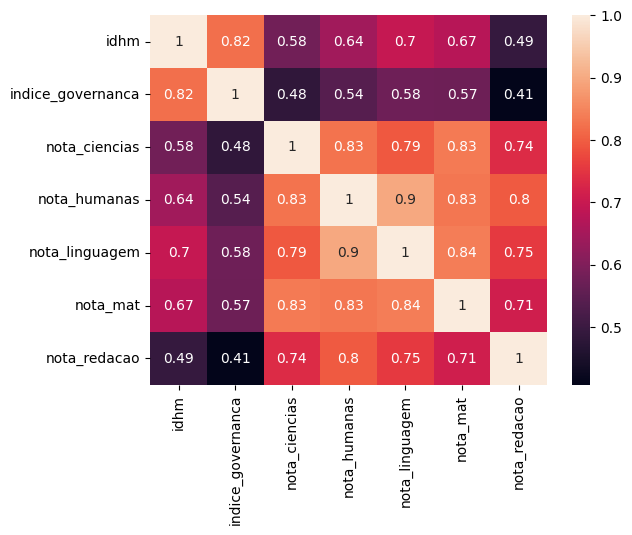

In [32]:
sns.heatmap(data=correlacoes_igm, annot=True)

### Correlação notas de humanas com redação

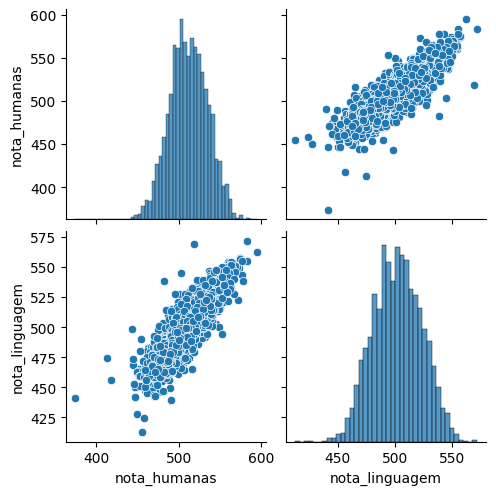

In [35]:
sns.pairplot(df_igm_reduzido[['nota_humanas', 'nota_linguagem']])

### Correlação entre idh e notas de redação

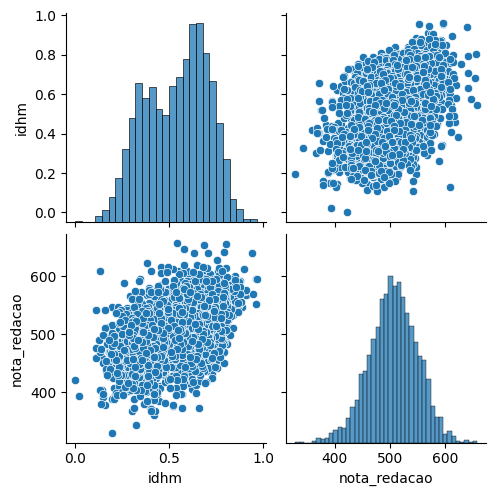

In [36]:
sns.pairplot(df_igm_reduzido[['idhm', 'nota_redacao']])